In [ ]:
install.packages("gtrendsR")
install.packages("dplyr")
install.packages("patchwork")
install.packages("ggforce")
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’, ‘anytime’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gtrendsR)
library(dplyr)
library(ggplot2)
library(patchwork)
library(ggforce)
library(ggrepel)

In [ ]:
Sys.setenv(TZ = "UTC")

In [ ]:
keyword <- c("Donald Trump", "Joe Biden")
time <- "2014-06-30 2022-01-01"
geo = "US"

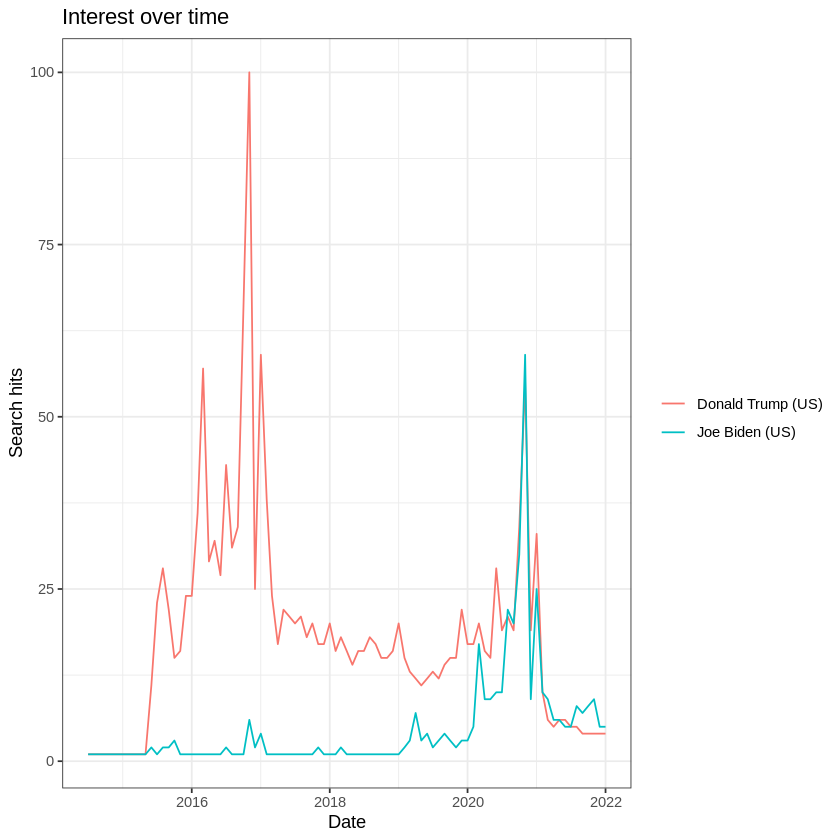

In [ ]:
search <- gtrends(keyword = keyword, time = time, geo = geo)
plot(search)

In [ ]:
time_trend<-search$interest_over_time %>%
  dplyr::mutate(hits=ifelse(hits=="<1",0.5,as.numeric(hits)),
                date=as.Date(date))

head(time_trend)

Warning message in ifelse(hits == "<1", 0.5, as.numeric(hits)):
“NAs introduced by coercion”


,date,hits,keyword,geo,time,gprop,category
,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,2014-07-01,1,Donald Trump,US,2014-06-30 2022-01-01,web,0
2,2014-08-01,1,Donald Trump,US,2014-06-30 2022-01-01,web,0
3,2014-09-01,1,Donald Trump,US,2014-06-30 2022-01-01,web,0
4,2014-10-01,1,Donald Trump,US,2014-06-30 2022-01-01,web,0
5,2014-11-01,1,Donald Trump,US,2014-06-30 2022-01-01,web,0
6,2014-12-01,1,Donald Trump,US,2014-06-30 2022-01-01,web,0


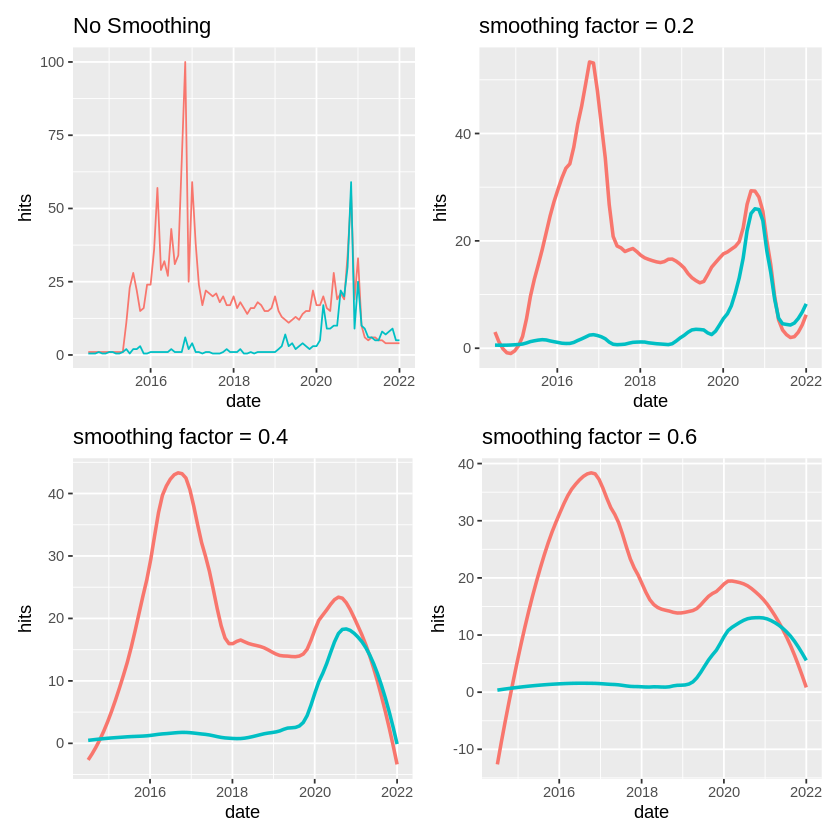

In [ ]:
plot_nosmooth<-ggplot(time_trend, aes(x=date, y=hits, colour = keyword)) +
  geom_line() +
  labs(title="No Smoothing") +
  theme(legend.position = "none")

plot_smooth_20<-ggplot(time_trend, aes(x=date, y=hits, colour = keyword)) +
    geom_smooth(formula = y ~ x, method="loess",span=0.2, se=FALSE) +
  labs(title="smoothing factor = 0.2")+
  theme(legend.position = "none")

plot_smooth_40<-ggplot(time_trend, aes(x=date, y=hits, colour = keyword)) +
    geom_smooth(formula = y ~ x, method="loess",span=0.4, se=FALSE) +
  labs(title="smoothing factor = 0.4")+
  theme(legend.position = "none")

plot_smooth_60<-ggplot(time_trend, aes(x=date, y=hits, colour = keyword)) +
    geom_smooth(formula = y ~ x, method="loess",span=0.6, se=FALSE) +
  labs(title="smoothing factor = 0.6")+
  theme(legend.position = "none")


(plot_nosmooth + plot_smooth_20) / (plot_smooth_40 + plot_smooth_60)

In [ ]:
keyword <- c("Ukrne")
time <- "2022-12-30 2022-11-01"
geo <- ""

In [ ]:
trends <- gtrends(keyword = keyword ,time = time)
iot2020 <- trends$interest_over_time

ERROR: ignored

In [ ]:
time_trend<-iot2020 %>%
  dplyr::mutate(hits=ifelse(hits=="<1",0.5,as.numeric(hits)),
                date=as.Date(date))

head(time_trend)

Warning message in ifelse(hits == "<1", 0.5, as.numeric(hits)):
“NAs introduced by coercion”


,date,hits,keyword,geo,time,gprop,category
,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,2019-12-01,0.0,Covid,world,2019-11-30 2022-08-01,web,0
2,2019-12-08,0.0,Covid,world,2019-11-30 2022-08-01,web,0
3,2019-12-15,0.0,Covid,world,2019-11-30 2022-08-01,web,0
4,2019-12-22,0.0,Covid,world,2019-11-30 2022-08-01,web,0
5,2019-12-29,0.5,Covid,world,2019-11-30 2022-08-01,web,0
6,2020-01-05,0.0,Covid,world,2019-11-30 2022-08-01,web,0


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



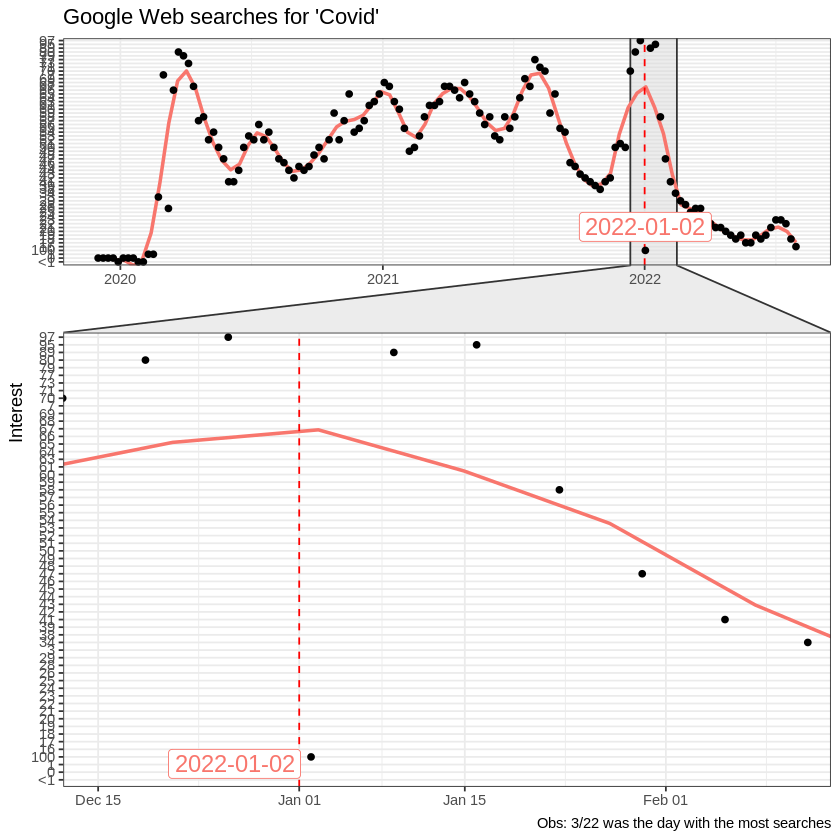

In [ ]:
iot2020 %>%
  ggplot(aes(x = date,
             y = hits,group=keyword,
             color = keyword))  +
  theme_bw()+
  labs(title = "Google Web searches for 'Covid'",
       caption = "Obs: 3/22 was the day with the most searches",
       x= NULL, y = "Interest")+
  ggforce::facet_zoom(xlim = c(as.POSIXct(as.Date("2021-12-15")),as.POSIXct(as.Date("2022-02-12")))) +
  geom_smooth(span=0.1,se=FALSE) + geom_vline(xintercept = as.POSIXct(as.Date("2022-01-01")),color = "red", lwd = 0.5,linetype="dashed")+
  theme(legend.position = "none") +
  geom_point(color="black")+
  geom_label_repel(data = subset(iot2020, hits == 100),
                   aes(label = as.character(date)),
                   size = 5,
                   box.padding = unit(0.35, "lines"),
                   point.padding = unit(0.3, "lines"))

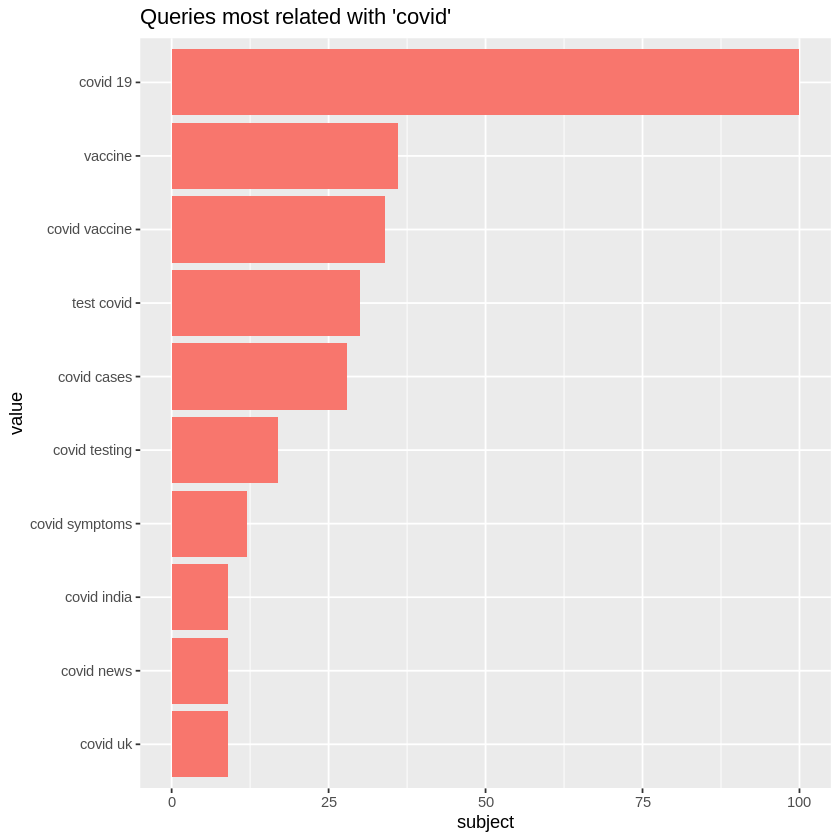

In [ ]:
trends$related_queries %>%
  filter(related_queries=="top") %>%
  mutate(value=factor(value,levels=rev(as.character(value))),
         subject=as.numeric(subject)) %>%
  top_n(10,value) %>%
  ggplot(aes(x=value,y=subject,fill="red")) +
  geom_bar(stat='identity',show.legend = F) +
  coord_flip() + labs(title="Queries most related with 'covid'")
